# Project 2 - Dimensionality Reduction

---

# About the Dataset

The training dataset is saved as a ```numpy``` array and contains a total of 6720 images from 10 classes. Each image is in grayscale and of size $300\times 300$. The 10 classes and its label encoding are:

| Character | a | b | c | d | e | f | g | h | $ | # |
| ----      | --| --| --| --| --| --| --| --| --| --|
| Label     |  0| 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |

In [6]:
class_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', '$', '#']

# Assignment

## Reducing the Images' Pixel size
For better computation, reducing the pixel size from 300x300 to 50x50

In [2]:
import numpy as np

# Loading the Training Data with corrected labels
#X_train = np.load('/content/drive/MyDrive/AML - P2/data_train.npy').T
#t_train = np.load('/content/drive/MyDrive/AML - P2/t_train.npy')

X_train = np.load('data_train.npy').T
t_train = np.load('t_train.npy')

In [3]:
# Resizing the images from 300x300 pixels to 50x50 for faster computation
import cv2

D = 50
X_train_resized = np.array([cv2.resize(x.reshape(300,300),(D,D)).reshape(D*D) for x in X_train])

## 1. RFE
1. Implement Recursive Feature Elimination (RFE) to select the subset of features. Experiment with at least 2 different estimators.

Implementing Recursive Feature Elimination (RFE) with Logistic Regression

In [ ]:
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Experimenting with the step size and n_features in RFE
steps = [0.05, 0.1, 0.2, 0.3]
n_features = [625, 900, None]

best_score = 0

# Looping through the step sizes to check for best performance
for step in steps:
    # Looping through the n_features to check for best performance
    for n in n_features:
        rfe_with_lr = RFE(LogisticRegression(), n_features_to_select=n, step=step)
        rfe_with_lr.fit(X_train_resized, t_train)

        score = rfe_with_lr.score(X_train_resized, t_train)

        if score > best_score:
            best_score = score
            best_rfe_with_lr = rfe_with_lr

            # Creating the mask of selected features
            selected_feature_mask = rfe_with_lr.support_.reshape(D,D)

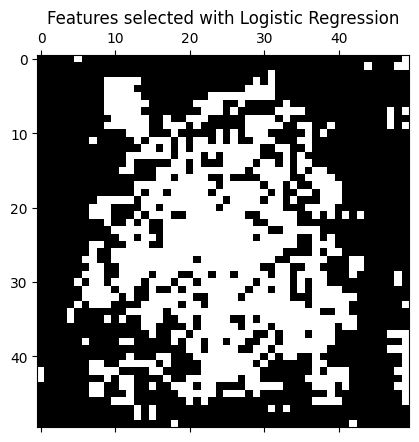

In [ ]:
# Plotting the mask
plt.matshow(selected_feature_mask, cmap='gray')
plt.title('Features selected with Logistic Regression')
plt.show()

In [ ]:
import joblib

# Saving the trained models as pickle files
joblib.dump(best_rfe_with_lr, 'RFE_with_LR.pkl');

Implementing Recursive Feature Elimination (RFE) with Random Forest Classifier

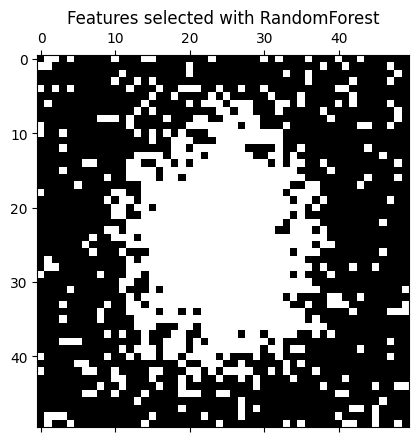

In [ ]:
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


# Defining the Random Forest estimator
estimator_rf = RandomForestClassifier(n_estimators=10, random_state=0)

# Experimenting with the step size and n_features in RFE
steps = [0.05, 0.1, 0.2, 0.3]
n_features = [625, 900, None]

best_score = 0

# Looping through the step sizes to check for best performance
for step in steps:
    # Looping through the n_features to check for best performance
    for n in n_features:
        rfe_with_rf = RFE(estimator_rf, n_features_to_select=n, step=step)
        rfe_with_rf.fit(X_train_resized, t_train)

        score = rfe_with_rf.score(X_train_resized, t_train)

        if score > best_score:
            best_score = score
            best_rfe = rfe_with_rf

            # Creating a mask of selected features
            selected_feature_mask = rfe_with_rf.support_.reshape(D,D)

# Plotting the mask
plt.matshow(selected_feature_mask, cmap='gray')
plt.title('Features selected with RandomForest')
plt.show()

In [ ]:
import joblib

# Saving the trained models as pickle files
joblib.dump(best_rfe, 'RFE_with_RF.pkl');

## 2. PCA
2. Implement Principal Component Analysis (PCA) to select the number of components that explain at least 90% of the explained variance. Train a classifier on the original dataset and the reduced dataset.
    * Compare performances.

In [58]:
from sklearn.decomposition import PCA

# Creating PCA to select features that explain 90% of variance
pca = PCA(n_components=0.90)

# Transforming the training data with the PCA
X_pca = pca.fit_transform(X_train_resized)

# Checking for the number of components for 90% explained variance
print('Number of components for 90% of explained variance:', pca.n_components_)

Number of components for 90% of explained variance: 165


In [59]:
from sklearn.model_selection import train_test_split

# Splitting the Training data into Train and test sets to evaluate performance
X_train_tr, X_train_t, t_train_tr, t_train_t = train_test_split(X_train_resized,
                                                                t_train,
                                                                test_size=0.2,
                                                                random_state=43)
X_pca_train, X_pca_test = train_test_split(X_pca, test_size=0.2,
                                           random_state=43)

Training on the Original Dataset

In [60]:
from sklearn.ensemble import RandomForestClassifier
import time

# Choosing Random Forest Classifier to train on the original dataset
rf = RandomForestClassifier(n_estimators=300)
# Timing the training for the original dataset
start_time = time.time()
rf.fit(X_train_tr, t_train_tr)
training_time_original = time.time() - start_time

Training on the Reduced Dataset

In [61]:
# Choosing Random Forest Classifier to train on the reduced dataset
rf_pca = RandomForestClassifier(n_estimators=300)
# Timing the training for the reduced dataset
start_time = time.time()
rf_pca.fit(X_pca_train, t_train_tr)
training_time_pca = time.time() - start_time

Comparing the Performances

In [7]:
# Comparing the Training times for the two cases
print(f"Training time for the original dataset: {training_time_original:.4f}s")
print(f"Training time for the reduced dataset: {training_time_pca:.4f}s")

Training time for the original dataset: 79.2785s
Training time for the reduced dataset: 24.9845s


In [8]:
from sklearn.metrics import classification_report

# Comparing the performances
print("Accuracies for the Original Dataset:")
print('Training Set:', rf.score(X_train_tr, t_train_tr))
print('Test Set:', rf.score(X_train_t, t_train_t), '\n')

print("Accuracies for the Reduced Dataset:")
print('Training Set:', rf_pca.score(X_pca_train, t_train_tr))
print('Test Set:', rf_pca.score(X_pca_test, t_train_t), '\n')

# Comparing performances with Classification reports
y_pred_original = rf.predict(X_train_t)
print("Performance on the original dataset:")
print(classification_report(t_train_t, y_pred_original))
y_pred_reduced = rf_pca.predict(X_pca_test)
print("Performance on the reduced dataset:")
print(classification_report(t_train_t, y_pred_reduced))

Accuracies for the Original Dataset:
Training Set: 1.0
Test Set: 0.46056547619047616 

Accuracies for the Reduced Dataset:
Training Set: 1.0
Test Set: 0.5602678571428571 

Performance on the original dataset:
              precision    recall  f1-score   support

         0.0       0.42      0.51      0.46       130
         1.0       0.35      0.44      0.39       116
         2.0       0.43      0.69      0.53       144
         3.0       0.64      0.38      0.47       152
         4.0       0.56      0.44      0.49       142
         5.0       0.41      0.33      0.36       143
         6.0       0.38      0.46      0.42       106
         7.0       0.43      0.37      0.40       134
         8.0       0.44      0.47      0.46       126
         9.0       0.66      0.52      0.58       151

    accuracy                           0.46      1344
   macro avg       0.47      0.46      0.46      1344
weighted avg       0.48      0.46      0.46      1344

Performance on the reduced datas

In [62]:
import joblib

# Saving the Trained PCA
joblib.dump(pca, 'PCA.pkl')
joblib.dump(rf, 'RF_without_PCA.pkl')
joblib.dump(rf_pca, 'RF_with_PCA.pkl');

---

## 3. LDA and t-SNE

3. Use Fisher's Linear Discriminant Analysis (LDA) and t-SNE to reduce the dataset to 2-dimensions and visualize it.
    * Visualize the dataset, be sure to color-code each point to its corresponding target label.
    * Visualize and compare the 2-dimensional projections with PCA.

Using Fisher's Linear Discriminant Analysis (LDA)

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Using Fisher's LDA to reduce to 2 dimensions
lda_2D = LDA(n_components=2)
X_lda = lda_2D.fit_transform(X_train_resized, t_train)

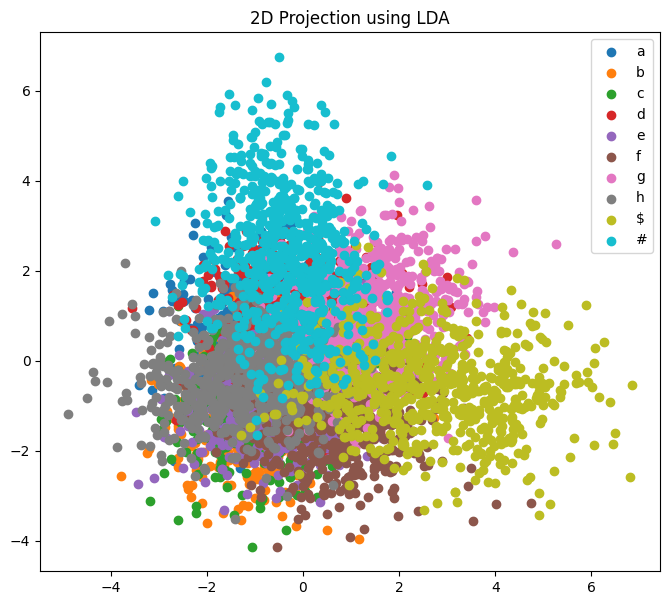

In [7]:
import matplotlib.pyplot as plt

# Visualizing the 2D projection with LDA
plt.figure(figsize=(8, 7))
for i in np.unique(t_train):
    plt.scatter(X_lda[t_train == i, 0], X_lda[t_train == i, 1], label=class_names[int(i)])
plt.title('2D Projection using LDA')
plt.legend()
plt.show()

In [8]:
import joblib

# Saving the Trained LDA model
joblib.dump(lda_2D, 'LDA_for_2D.pkl');

['LDA_for_2D.pkl']

Using t-SNE

In [9]:
from sklearn.manifold import TSNE

# Using t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, learning_rate='auto', init='random')
X_tsne = tsne.fit_transform(X_train_resized)

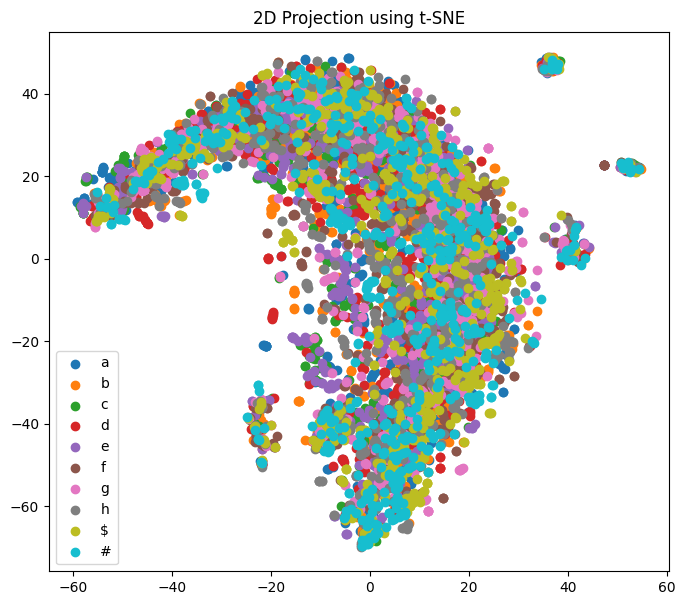

In [10]:
# Visualizing the 2D projection with t-SNE
plt.figure(figsize=(8, 7))
for i in np.unique(t_train):
    plt.scatter(X_tsne[t_train == i, 0], X_tsne[t_train == i, 1], label=class_names[int(i)])
plt.title('2D Projection using t-SNE')
plt.legend()
plt.show()

In [11]:
import joblib

# Saving the Trained t-SNE model
joblib.dump(tsne, 't-SNE_for_2D.pkl');

Using PCA

In [12]:
from sklearn.decomposition import PCA

# Using PCA to reduce to 2 dimensions
pca_2D = PCA(n_components=2)
X_pca_2D = pca_2D.fit_transform(X_train_resized)

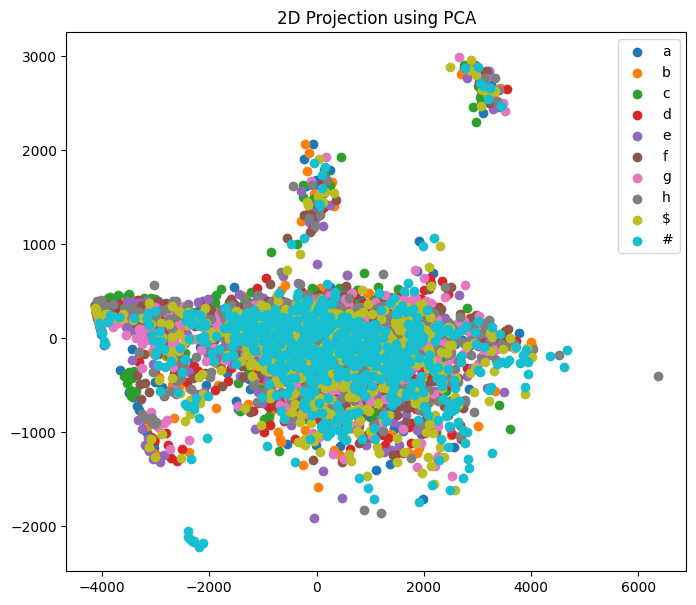

In [13]:
# Visualizing the 2D projection with PCA
plt.figure(figsize=(8, 7))
for i in np.unique(t_train):
    plt.scatter(X_pca_2D[t_train == i, 0], X_pca_2D[t_train == i, 1], label=class_names[int(i)])
plt.title('2D Projection using PCA')
plt.legend()
plt.show()

In [14]:
import joblib

# Saving the Trained t-SNE model
joblib.dump(pca_2D, 'PCA_for_2D.pkl');

---

## 4. Manifolds
4. Implement at least 3 manifold learning algorithms for reducing the dimensionality of the feature space. Utilize the new lower-dimensional feature space to build a classifier.
    * Visualize and interpret what the first 2 dimensions in the manifold learning algorithm you train.

#### MDS

In [42]:
from sklearn.manifold import MDS

mds1 = MDS(n_components=100)
X_mds1 = mds1.fit_transform(X_train_resized)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [43]:
from sklearn.model_selection import train_test_split

# Splitting the Training data into Train and test sets to evaluate performance
X_mds_train, X_mds_test, t_train_tr, t_train_t = train_test_split(X_mds1, t_train,
                                                                  test_size=0.2,
                                                                  random_state=43)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Random forest Classifier for the MDS reduced dataset
mds_rf = RandomForestClassifier(random_state=0)
mds_rf.fit(X_mds_train, t_train_tr)

# Evaluating the classifier
t_pred_mds = mds_rf.predict(X_mds_test)
print(classification_report(t_train_t, t_pred_mds))

              precision    recall  f1-score   support

         0.0       0.08      0.12      0.10       130
         1.0       0.08      0.10      0.09       116
         2.0       0.19      0.25      0.21       144
         3.0       0.18      0.11      0.13       152
         4.0       0.14      0.10      0.12       142
         5.0       0.12      0.10      0.11       143
         6.0       0.13      0.15      0.14       106
         7.0       0.13      0.09      0.10       134
         8.0       0.16      0.18      0.17       126
         9.0       0.24      0.21      0.22       151

    accuracy                           0.14      1344
   macro avg       0.14      0.14      0.14      1344
weighted avg       0.15      0.14      0.14      1344



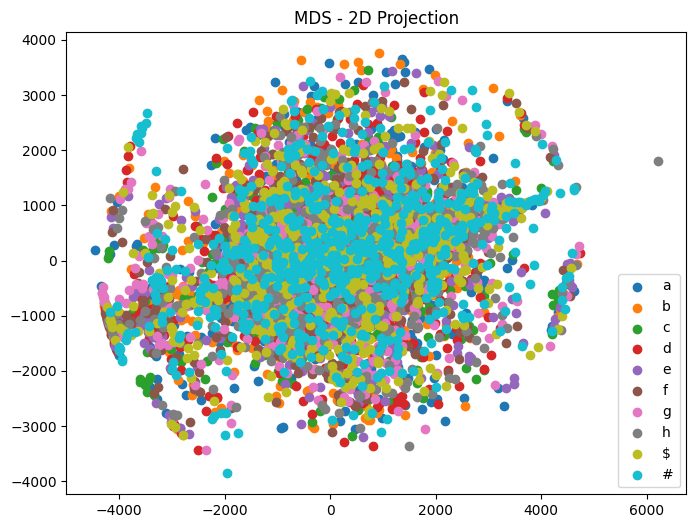

In [10]:
# Visualizing the 2D projection using MDS
from sklearn.manifold import MDS

mds = MDS(n_components=2)
X_mds = mds.fit_transform(X_train_resized)

import matplotlib.pyplot as plt

# Visualizing the 2D projection
plt.figure(figsize=(8, 6))
for label in np.unique(t_train):
    plt.scatter(X_mds[t_train == label, 0], X_mds[t_train == label, 1], label=class_names[int(label)])
plt.title("MDS - 2D Projection")
plt.legend()
plt.show()

In [47]:
import joblib

# Saving the trained MDS models
joblib.dump(mds1, 'MDS.pkl')
joblib.dump(mds_rf, 'RF_with_MDS.pkl')
joblib.dump(mds, 'MDS_2D.pkl');

#### ISOMAP

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.manifold import Isomap

# Using ISOMAP to reduce to 100 features
isomap = Isomap(n_components=100, n_neighbors=50)
X_isomap = isomap.fit_transform(X_train_resized)

# Splitting the transformed data to apply a classifier
X_isomap_train, X_isomap_test, t_train_tr, t_train_t = train_test_split(X_isomap,
                                                                        t_train,
                                                                        test_size=0.2,
                                                                        random_state=42)

# Random Forest Classifier for the ISOMAP reduced dataset
isomap_rf = RandomForestClassifier(random_state=42)
isomap_rf.fit(X_isomap_train, t_train_tr)

# Evaluating the classifier
print('For the Training Set:')
y_pred_isomap = isomap_rf.predict(X_isomap_train)
print(classification_report(t_train_tr, y_pred_isomap))

print('\nFor the Test Set:')
t_pred_isomap = isomap_rf.predict(X_isomap_test)
print(classification_report(t_train_t, t_pred_isomap))

For the Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       540
         1.0       1.00      1.00      1.00       558
         2.0       1.00      1.00      1.00       556
         3.0       1.00      1.00      1.00       535
         4.0       1.00      1.00      1.00       532
         5.0       1.00      1.00      1.00       518
         6.0       1.00      1.00      1.00       535
         7.0       1.00      1.00      1.00       548
         8.0       1.00      1.00      1.00       524
         9.0       1.00      1.00      1.00       530

    accuracy                           1.00      5376
   macro avg       1.00      1.00      1.00      5376
weighted avg       1.00      1.00      1.00      5376


For the Test Set:
              precision    recall  f1-score   support

         0.0       0.33      0.32      0.33       146
         1.0       0.26      0.26      0.26       129
         2.0       0.37      0.50    

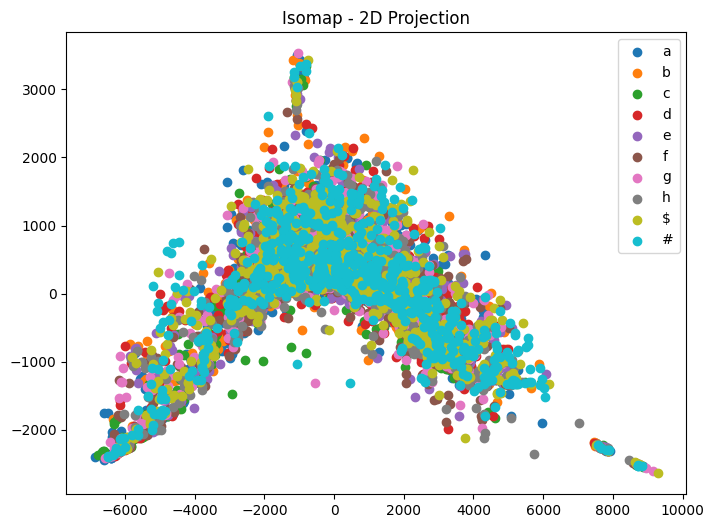

In [50]:
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap

isomap_2D = Isomap(n_components=2, n_neighbors=50)
X_isomap = isomap_2D.fit_transform(X_train_resized)

# Visualizing the 2D projection using ISOMAP
plt.figure(figsize=(8, 6))
for label in np.unique(t_train):
    plt.scatter(X_isomap[t_train == label, 0], X_isomap[t_train == label, 1], label=class_names[int(label)])
plt.title("Isomap - 2D Projection")
plt.legend()
plt.show()

In [51]:
import joblib

# Saving the Trained ISOMAP models
joblib.dump(isomap, 'ISOMAP.pkl')
joblib.dump(isomap_rf, 'RF_with_ISOMAP.pkl')
joblib.dump(isomap_2D, 'ISOMAP_2D.pkl');

#### LLE

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.manifold import LocallyLinearEmbedding

# Implementing LLE to reduce to 100 features
lle = LocallyLinearEmbedding(n_components=100, n_neighbors=50)
X_lle = lle.fit_transform(X_train_resized)

# Splitting the transformed data to apply a classifier
X_lle_train, X_lle_test, t_train_tr, t_train_t = train_test_split(X_lle, t_train,
                                                                  test_size=0.2,
                                                                  random_state=43)

# Random Forest Classifier for the LLE reduced dataset
lle_rf = RandomForestClassifier(random_state=43)
lle_rf.fit(X_lle_train, t_train_tr)

# Evaluating the classifier
print('For the Training Set:')
y_pred_lle = lle_rf.predict(X_lle_train)
print(classification_report(t_train_tr, y_pred_lle))

print('\nFor the Test Set:')
t_pred_lle = lle_rf.predict(X_lle_test)
print(classification_report(t_train_t, t_pred_lle))

For the Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       556
         1.0       1.00      1.00      1.00       571
         2.0       1.00      1.00      1.00       529
         3.0       1.00      1.00      1.00       513
         4.0       1.00      1.00      1.00       512
         5.0       1.00      1.00      1.00       520
         6.0       1.00      1.00      1.00       562
         7.0       1.00      1.00      1.00       545
         8.0       1.00      1.00      1.00       546
         9.0       1.00      1.00      1.00       522

    accuracy                           1.00      5376
   macro avg       1.00      1.00      1.00      5376
weighted avg       1.00      1.00      1.00      5376


For the Test Set:
              precision    recall  f1-score   support

         0.0       0.36      0.42      0.39       130
         1.0       0.29      0.38      0.33       116
         2.0       0.40      0.54    

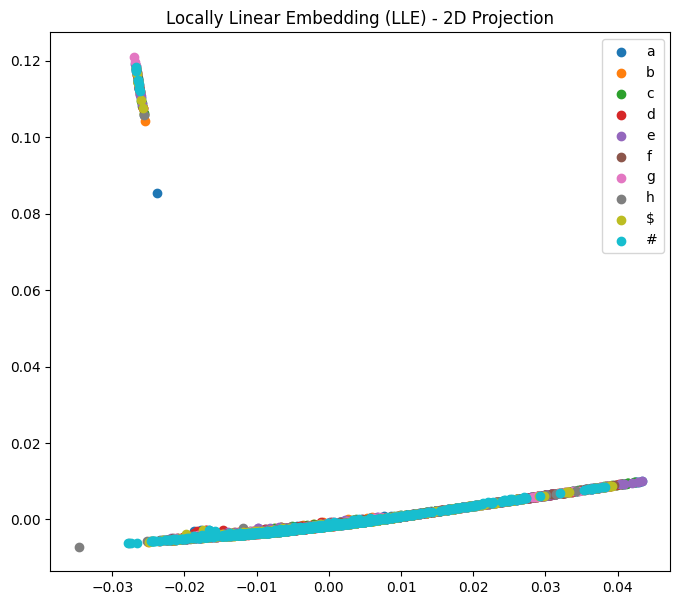

In [55]:
from sklearn.manifold import LocallyLinearEmbedding

lle_2D = LocallyLinearEmbedding(n_components=2, n_neighbors=50)
X_lle = lle_2D.fit_transform(X_train_resized)

# Visualizing the 2D projection using LLE
plt.figure(figsize=(8, 7))
for label in np.unique(t_train):
    plt.scatter(X_lle[t_train == label, 0], X_lle[t_train == label, 1], label=class_names[int(label)])
plt.title("Locally Linear Embedding (LLE) - 2D Projection")
plt.legend()
plt.show()

In [56]:
import joblib

# Saving the Trained LLE models
joblib.dump(lle, 'LLE.pkl')
joblib.dump(lle_rf, 'RF_with_LLE.pkl')
joblib.dump(lle_2D, 'LLE_2D.pkl');

---